In [1]:
#Upgrading the kaggle version
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/94/a7/09/68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c/kaggle-1.5.8-cp36-none-any.whl
  Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8


In [2]:
#Loading the rsna-pneumonia-detection-challenge dataset
import os
os.environ['KAGGLE_USERNAME'] = "elamathisenguttuvan" # username from the json file
os.environ['KAGGLE_KEY'] = "fb56946ad9d3fd4da4d5d2287a3498df" # key from the json file
!kaggle competitions download -c rsna-pneumonia-detection-challenge

rsna-pneumonia-detection-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#Installing pydicom library
!pip3 install -q pydicom         

In [4]:
#Extracting the dataset files
path_to_zip_file='/content/rsna-pneumonia-detection-challenge.zip'
directory_to_extract_to='/content/rsna-pneumonia-detection-challenge'
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [5]:
#Loading train images
TRAIN_DIR='/content/rsna-pneumonia-detection-challenge/stage_2_train_images'

In [6]:
#The train and test pathnames are retrieved and stored in array format
import glob
train_images=glob.glob(TRAIN_DIR + '/*.dcm')

In [7]:
#Loading the labels dataset
import pandas as pd
train_lbls=pd.read_csv('/content/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv')
detail=pd.read_csv('/content/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv')

In [8]:
trainData=pd.merge(train_lbls,detail,on='patientId')

In [9]:
import pydicom
patientId_data=[]
Age=[]
patientSex=[]

for i in range(len(train_images)):
  ds = pydicom.read_file(train_images[i]) 
  Id=ds.PatientID
  age=ds.PatientAge
  patient_sex=ds.PatientSex
  modality=ds.Modality
  patientId_data.append(Id)
  Age.append(age)
  patientSex.append(patient_sex)


In [10]:
dict={'patientId':patientId_data,'Age':Age,'patientSex':patientSex}
train_Data=pd.DataFrame(dict)

In [11]:
train_data=pd.merge(trainData,train_Data,on='patientId')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Age distribution over pneumonia affected patients')

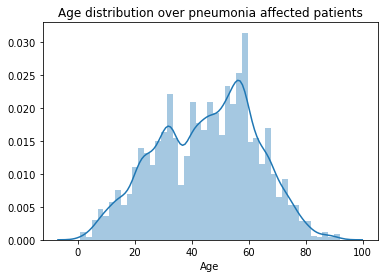

In [12]:
filter=train_data.apply(lambda x:x['Target']==1,axis=1)
tar_lbls=train_data[filter]
import seaborn as sns

plot=sns.distplot(tar_lbls['Age'])
plot.set_title("Age distribution over pneumonia affected patients")

Text(0, 0.5, 'Number of Occurrences')

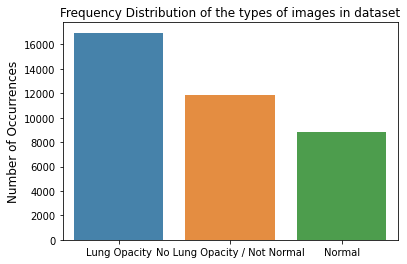

In [13]:
import matplotlib.pyplot as plt

class_count=train_data['class'].value_counts()
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of the types of images in dataset')
plt.ylabel('Number of Occurrences', fontsize=12)

Text(0, 0.5, 'Number of Occurrences')

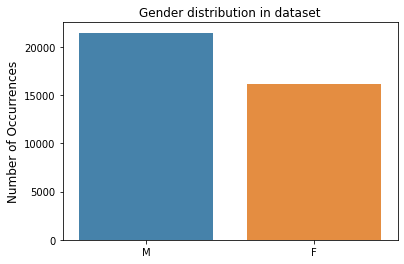

In [14]:
gender_count=train_data['patientSex'].value_counts()
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Gender distribution in dataset')
plt.ylabel('Number of Occurrences', fontsize=12)


Text(0, 0.5, 'Number of Occurrences')

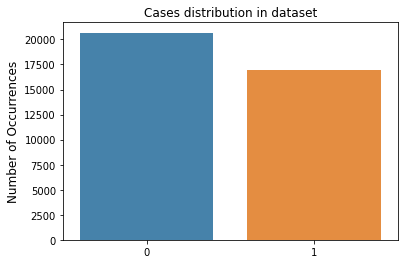

In [15]:
Positive_count=train_data['Target'].value_counts()
sns.barplot(Positive_count.index, Positive_count.values, alpha=0.9)
plt.title('Cases distribution in dataset')
plt.ylabel('Number of Occurrences', fontsize=12)


In [16]:
#Converting the dcm images to array 
import pydicom
img_data=[]
for i in range(500):
  ds = pydicom.read_file(train_images[i]) 
  img=ds.pixel_array
  img_data.append(img)

In [17]:
#Creating a array of patient ID's
ID=[]
for i in range(500):
  ds = pydicom.read_file(train_images[i]) 
  id=ds.PatientID
  ID.append(id)

In [18]:
dict={'patientId':ID,'Image':img_data}
image_df=pd.DataFrame(dict)

In [19]:
Data=pd.merge(train_data,image_df,on='patientId')
Data.head()

,patientId,x,y,width,height,Target,class,Age,patientSex,Image
0,01fe92f7-ff87-4f9e-9077-e00e670d1b47,NaN,NaN,NaN,NaN,0,Normal,39,M,"[[7, 14, 12, 12, 13, 11, 12, 10, 12, 12, 12, 1..."
1,05d3817a-5535-4e77-8dda-d4412e496c81,256.0,73.0,274.0,682.0,1,Lung Opacity,64,M,"[[0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,..."
2,05d3817a-5535-4e77-8dda-d4412e496c81,256.0,73.0,274.0,682.0,1,Lung Opacity,64,M,"[[0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,..."
3,05d3817a-5535-4e77-8dda-d4412e496c81,614.0,78.0,276.0,759.0,1,Lung Opacity,64,M,"[[0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,..."
4,05d3817a-5535-4e77-8dda-d4412e496c81,614.0,78.0,276.0,759.0,1,Lung Opacity,64,M,"[[0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,..."


In [20]:
x=Data[['patientId','Image']]
x.head()

,patientId,Image
0,01fe92f7-ff87-4f9e-9077-e00e670d1b47,"[[7, 14, 12, 12, 13, 11, 12, 10, 12, 12, 12, 1..."
1,05d3817a-5535-4e77-8dda-d4412e496c81,"[[0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,..."
2,05d3817a-5535-4e77-8dda-d4412e496c81,"[[0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,..."
3,05d3817a-5535-4e77-8dda-d4412e496c81,"[[0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,..."
4,05d3817a-5535-4e77-8dda-d4412e496c81,"[[0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,..."


In [21]:
import numpy as np

dict={'id':Data['patientId'],'x':Data['x'],'y':Data['y'],'width':Data['width'],'height':Data['height']}
y=pd.DataFrame(dict)
y['x'].replace(np.nan,0,inplace=True)
y['y'].replace(np.nan,0,inplace=True)
y['width'].replace(np.nan,0,inplace=True)
y['height'].replace(np.nan,0,inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,test_size=0.4,random_state=123)

In [23]:
print("Shape of x_train",x_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (456, 2)
Shape of y_train (456, 5)
Shape of x_test (305, 2)
Shape of y_test (305, 5)


In [24]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
IMAGE_HEIGHT=224
IMAGE_WIDTH=224

X_train = np.zeros((x_train.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH,3))
for index in range(x_train.shape[0]):
    img = x_train.iloc[index][1]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))

In [25]:
X_train.shape

(456, 224, 224, 3)

In [26]:
masks = np.zeros((y_train.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH))
for i in range(y_train.shape[0]):
  x1 = int(y_train.iloc[i]['x']*224/1024)
  x2 = int(y_train.iloc[i]['width']*224/1024 + x1)
  y1 = int(y_train.iloc[i]['y']*224/1024)
  y2 = int(y_train.iloc[i]['height']*224/1024 + y1)

  masks[i][y1:y2,x1:x2]=1


In [27]:
X_test = np.zeros((x_test.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH,3))
for index in range(x_test.shape[0]):
    img = x_test.iloc[index][1]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    X_test[index] = preprocess_input(np.array(img, dtype=np.float32))

In [28]:
X_test.shape

(305, 224, 224, 3)

In [29]:
masks_test = np.zeros((y_test.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH))
for i in range(y_test.shape[0]):
  x1 = int(y_test.iloc[i]['x']*224/1024)
  x2 = int(y_test.iloc[i]['width']*224/1024 + x1)
  y1 = int(y_test.iloc[i]['y']*224/1024)
  y2 = int(y_test.iloc[i]['height']*224/1024 + y1)

  masks_test[i][y1:y2,x1:x2]=1


In [30]:
masks_test.shape

(305, 224, 224)

In [31]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

ALPHA=1
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable

    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = UpSampling2D()(x)
    x = UpSampling2D()(x)
    x = UpSampling2D()(x)

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((224, 224))(x)

    return Model(inputs=model.input, outputs=x)

In [32]:
model = create_model(False)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

In [33]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [34]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [35]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [ ]:
import tensorflow
model.fit(X_train, masks, validation_data = (X_test,masks_test), epochs=25, batch_size=16, verbose=1)

Epoch 1/25
29/29 [==============================] - 360s 12s/step - loss: 2.3547 - dice_coefficient: 0.1231 - val_loss: 2.3722 - val_dice_coefficient: 0.1224
Epoch 2/25
29/29 [==============================] - 332s 11s/step - loss: 2.2280 - dice_coefficient: 0.1380 - val_loss: 2.2623 - val_dice_coefficient: 0.1344
Epoch 3/25
29/29 [==============================] - 332s 11s/step - loss: 2.1408 - dice_coefficient: 0.1492 - val_loss: 2.1692 - val_dice_coefficient: 0.1462
Epoch 4/25
29/29 [==============================] - 332s 11s/step - loss: 1.9982 - dice_coefficient: 0.1650 - val_loss: 2.0934 - val_dice_coefficient: 0.1570
Epoch 5/25
29/29 [==============================] - 330s 11s/step - loss: 1.9266 - dice_coefficient: 0.1762 - val_loss: 2.0326 - val_dice_coefficient: 0.1657
Epoch 6/25
29/29 [==============================] - 345s 12s/step - loss: 1.8911 - dice_coefficient: 0.1875 - val_loss: 1.9777 - val_dice_coefficient: 0.1749
Epoch 7/25
29/29 [==============================] - 